# 데이터 전처리

In [1]:
# import os
# import unicodedata
# from PIL import Image

# # 이미지 경로 설정
# dataset_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/DALLE"
# fake_dir = os.path.join(dataset_dir, "fake")

# # 파일명 정리 + 변환 함수
# def clean_and_convert_images(directory):
#     for filename in os.listdir(directory):
#         # 유니코드 정규화 (한글 깨짐 방지)
#         normalized_filename = unicodedata.normalize("NFC", filename)
#         new_filename = normalized_filename  # 기본 파일명 설정

#         # "의 사본" 삭제
#         if "의 사본" in new_filename:
#             new_filename = new_filename.replace("의 사본", "").strip()

#         # 중복 확장자 제거 (예: .webp.webp → .webp)
#         root, ext = os.path.splitext(new_filename)
#         if root.endswith(ext):
#             new_filename = root

#         old_path = os.path.join(directory, filename)
#         new_path = os.path.join(directory, new_filename)

#         # 파일명이 변경되었을 경우만 수정
#         if filename != new_filename:
#             os.rename(old_path, new_path)
#             print(f"Renamed: {filename} -> {new_filename}")
#             old_path = new_path  # 변경된 파일명을 기반으로 다시 설정

#         # 확장자가 .webp인 경우 .png로 변환
#         if new_filename.endswith(".webp"):
#             png_filename = new_filename.replace(".webp", ".png")
#             png_path = os.path.join(directory, png_filename)

#             with Image.open(old_path) as img:
#                 img.save(png_path, "PNG")  # PNG로 저장

#             os.remove(old_path)  # 원본 .webp 파일 삭제
#             print(f"Converted: {new_filename} -> {png_filename}")

# # fake 디렉토리에서만 실행
# clean_and_convert_images(fake_dir)

# print("📂 fake 디렉토리 파일 정리 및 변환 완료! ✅")


# GPU 할당

In [1]:
import tensorflow as tf

# GPU 0만 사용
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')  # GPU 0만 사용
        tf.config.experimental.set_memory_growth(gpus[0], True)  # 메모리 동적 할당
    except RuntimeError as e:
        print(e)

# TensorFlow에서 사용할 장치 확인
print(tf.config.experimental.list_logical_devices('GPU'))


2025-03-08 01:03:40.503071: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-08 01:03:40.517409: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-08 01:03:40.521752: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-08 01:03:40.534784: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-03-08 01:03:41.326986: W tensorflow/compiler/tf2

[LogicalDevice(name='/device:GPU:0', device_type='GPU')]


2025-03-08 01:03:42.893956: I tensorflow/core/common_runtime/gpu/gpu_device.cc:2021] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 22495 MB memory:  -> device: 0, name: NVIDIA RTX A5000, pci bus id: 0000:01:00.0, compute capability: 8.6


# 필요한 라이브러리 로드

In [16]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix, classification_report

# 모델 로드

In [19]:
# 모델 로드
model_path = "/home/jangminoh_2/AI_Detector/model/model_v7.h5"
model = load_model(model_path)

# DALLE

In [17]:
# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/DALLE"
fake_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/DALLE/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/DALLE/real"

Found 60 images belonging to 2 classes.


 1/60 ━━━━━━━━━━━━━━━━━━━━ 4s 81ms/step

/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step
[[0.99958533]
 [0.47874838]
 [0.83176684]
 [0.25970027]
 [0.341769  ]
 [0.31617686]
 [0.2925106 ]
 [0.08671545]
 [0.53007823]
 [0.17365743]
 [0.07386789]
 [0.66359556]
 [0.5306875 ]
 [0.3742632 ]
 [0.10974998]
 [0.33830717]
 [0.56962705]
 [0.5774097 ]
 [0.39338386]
 [0.57133424]
 [0.73059773]
 [0.21438621]
 [0.78030556]
 [0.18246059]
 [0.14356744]
 [0.08114398]
 [0.5125822 ]
 [0.49417332]
 [0.8553896 ]
 [0.1185357 ]
 [0.04287858]
 [0.00910515]
 [0.01652789]
 [0.22059211]
 [0.16775605]
 [0.09039018]
 [0.29656112]
 [0.01959733]
 [0.02748545]
 [0.22865053]
 [0.0625132 ]
 [0.21347965]
 [0.20203733]
 [0.9002156 ]
 [0.1262672 ]
 [0.05734411]
 [0.19560075]
 [0.5350796 ]
 [0.07000478]
 [0.8377765 ]
 [0.07946479]
 [0.9378149 ]
 [0.03893635]
 [0.44696468]
 [0.09136584]
 [0.07482798]
 [0.15467602]
 [0.2823805 ]
 [0.13969393]
 [0.04867435]]
Model Accuracy: 0.7333


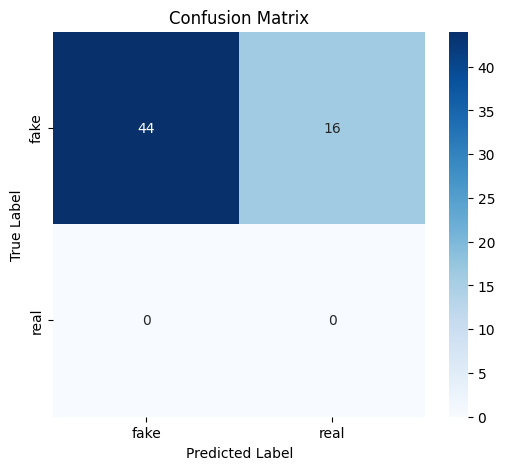


Classification Report:
              precision    recall  f1-score   support

        fake       1.00      0.73      0.85        60
        real       0.00      0.00      0.00         0

    accuracy                           0.73        60
   macro avg       0.50      0.37      0.42        60
weighted avg       1.00      0.73      0.85        60



/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [18]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


# Flamel

In [ ]:
# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/Flamel"
fake_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/Flamel/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/Flamel/real"

In [5]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 128, Real: 0


Found 128 images belonging to 2 classes.


/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1741362757.140472 3304741 service.cc:146] XLA service 0x736cc8002730 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741362757.140537 3304741 service.cc:154]   StreamExecutor device (0): NVIDIA RTX A5000, Compute Capability 8.6
I0000 00:00:1741362757.140577 3304741 service.cc:154]   StreamExecutor device (1): NVIDIA RTX A5000, Compute Capability 8.6
I0000 00:00:1741362757.140582 3304741 service.cc:154]   StreamExecutor device (2): NVIDIA RTX A5000, Compute Capability 8.6
I0000 00:00:1741362757.140586 3304741 service.cc:154]   S

  7/128 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step

I0000 00:00:1741362767.578324 3304741 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


128/128 ━━━━━━━━━━━━━━━━━━━━ 16s 19ms/step
[[0.47034284]
 [0.47569472]
 [0.8318606 ]
 [0.48402822]
 [0.82540894]
 [0.8486522 ]
 [0.19273   ]
 [0.47311026]
 [0.6963995 ]
 [0.8907788 ]
 [0.81922454]
 [0.97745204]
 [0.8071931 ]
 [0.7072897 ]
 [0.46425733]
 [0.589615  ]
 [0.09867805]
 [0.34577906]
 [0.8744155 ]
 [0.6959851 ]
 [0.6274189 ]
 [0.5826797 ]
 [0.765122  ]
 [0.27373302]
 [0.5516183 ]
 [0.4259678 ]
 [0.30110916]
 [0.24982198]
 [0.4188579 ]
 [0.9512096 ]
 [0.49076805]
 [0.8790091 ]
 [0.30661285]
 [0.6694972 ]
 [0.6793493 ]
 [0.10154165]
 [0.10269909]
 [0.71217376]
 [0.71274364]
 [0.3189774 ]
 [0.00518519]
 [0.10996804]
 [0.04550503]
 [0.9173844 ]
 [0.00319578]
 [0.10420887]
 [0.25260854]
 [0.1759439 ]
 [0.7429454 ]
 [0.5778452 ]
 [0.70083076]
 [0.52286744]
 [0.37348133]
 [0.01796835]
 [0.10742301]
 [0.9890689 ]
 [0.20542182]
 [0.3072077 ]
 [0.5405876 ]
 [0.39839187]
 [0.18187699]
 [0.9896954 ]
 [0.48964444]
 [0.2971808 ]
 [0.7828282 ]
 [0.06574456]
 [0.21395698]
 [0.8764238 ]
 [0.9

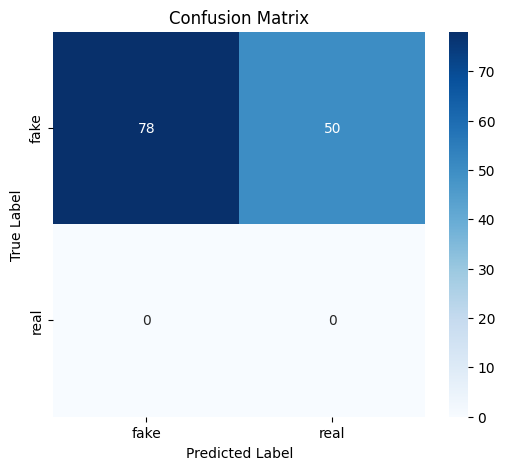


Classification Report:
              precision    recall  f1-score   support

        fake       1.00      0.61      0.76       128
        real       0.00      0.00      0.00         0

    accuracy                           0.61       128
   macro avg       0.50      0.30      0.38       128
weighted avg       1.00      0.61      0.76       128



/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [8]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


# Midjourney

In [ ]:
# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/Midjourney"
fake_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/Midjourney/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/Midjourney/real"

In [11]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 132, Real: 0


Found 132 images belonging to 2 classes.


/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


132/132 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step
[[0.38640153]
 [0.9818419 ]
 [0.6024916 ]
 [0.36592788]
 [0.0371393 ]
 [0.21196574]
 [0.180779  ]
 [0.03243743]
 [0.05511816]
 [0.06265891]
 [0.16960719]
 [0.05118005]
 [0.6842439 ]
 [0.59843916]
 [0.44949228]
 [0.23197865]
 [0.11876605]
 [0.12356593]
 [0.70442784]
 [0.75846076]
 [0.05827218]
 [0.4221867 ]
 [0.28584433]
 [0.25398737]
 [0.7814755 ]
 [0.52641577]
 [0.77225065]
 [0.70168334]
 [0.9380691 ]
 [0.8359368 ]
 [0.7383084 ]
 [0.75495327]
 [0.66374946]
 [0.93810844]
 [0.75495327]
 [0.34862977]
 [0.48873064]
 [0.91292477]
 [0.8340311 ]
 [0.68345344]
 [0.90557486]
 [0.66367763]
 [0.26211822]
 [0.6066148 ]
 [0.26779738]
 [0.02740333]
 [0.05445459]
 [0.0747319 ]
 [0.17405042]
 [0.12117667]
 [0.12250338]
 [0.07282975]
 [0.04990667]
 [0.85468876]
 [0.9044195 ]
 [0.98494613]
 [0.25184846]
 [0.80961794]
 [0.11802603]
 [0.15962629]
 [0.22576603]
 [0.34201178]
 [0.192206  ]
 [0.40313318]
 [0.7994358 ]
 [0.5462497 ]
 [0.56720644]
 [0.9265173 ]
 [0.0

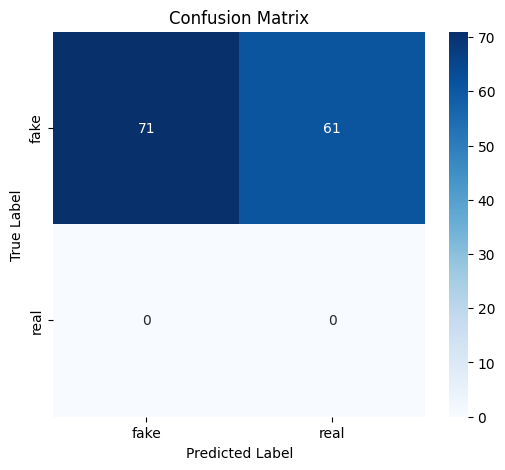


Classification Report:
              precision    recall  f1-score   support

        fake       1.00      0.54      0.70       132
        real       0.00      0.00      0.00         0

    accuracy                           0.54       132
   macro avg       0.50      0.27      0.35       132
weighted avg       1.00      0.54      0.70       132



/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [13]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# StableDiffusion

In [ ]:
# 데이터셋 경로
dataset_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/StableDiffusion"
fake_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/StableDiffusion/fake"
real_dir = "/home/jangminoh_2/AI_Detector/data/GeneratedModel 분류/StableDiffusion/real"

In [10]:
fake_count = len(os.listdir(fake_dir)) if os.path.exists(fake_dir) else 0
real_count = len(os.listdir(real_dir)) if os.path.exists(real_dir) else 0

print(f"Fake: {fake_count}, Real: {real_count}")

Fake: 20, Real: 0


Found 20 images belonging to 2 classes.


/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


20/20 ━━━━━━━━━━━━━━━━━━━━ 10s 21ms/step
[[0.84255236]
 [0.9911146 ]
 [0.9993754 ]
 [0.9984022 ]
 [0.9288036 ]
 [0.8421873 ]
 [0.98849934]
 [0.8476753 ]
 [0.98037153]
 [0.98324054]
 [0.78287697]
 [0.7464866 ]
 [0.5733086 ]
 [0.98238635]
 [0.7596438 ]
 [0.82937783]
 [0.6550651 ]
 [0.7879958 ]
 [0.90670687]
 [0.28030214]]
Model Accuracy: 0.0500


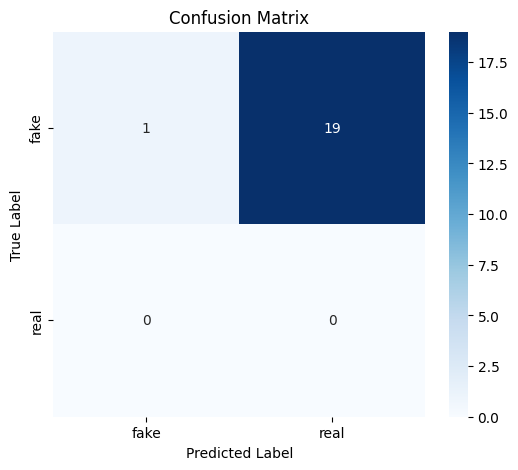


Classification Report:
              precision    recall  f1-score   support

        fake       1.00      0.05      0.10        20
        real       0.00      0.00      0.00         0

    accuracy                           0.05        20
   macro avg       0.50      0.03      0.05        20
weighted avg       1.00      0.05      0.10        20



/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/jangminoh_2/miniconda3/envs/ml-ops/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

In [12]:
# 이미지 크기 및 배치 사이즈 설정
img_size = (528, 528)  # EfficientNetB6의 입력 크기에 맞게 변경 가능
batch_size = 1

# 데이터 로더 설정 (test용)
datagen = ImageDataGenerator(
    preprocessing_function=tf.keras.applications.efficientnet.preprocess_input
)

test_generator = datagen.flow_from_directory(
    dataset_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode="binary",  # 이진 분류 (fake vs real)
    shuffle= False
)

# 실제 라벨 가져오기
y_true = test_generator.classes  # 0: fake, 1: real
#print(y_true)
class_names = list(test_generator.class_indices.keys())
#print(class_names) #['fake', 'real']
#print(test_generator.class_indices)

# 예측 수행
y_pred_probs = model.predict(test_generator, steps=test_generator.samples)  # 확률값 출력
print(y_pred_probs)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()  # 0.5 이상이면 1(real), 아니면 0(fake)

# 정확도 출력
accuracy = np.mean(y_pred == y_true)
print(f"Model Accuracy: {accuracy:.4f}")

# Confusion Matrix 생성
cm = confusion_matrix(y_true, y_pred)

# Confusion Matrix 시각화
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# 분류 보고서 출력
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))
